In [72]:
import sys
import os
import math
import logging
import galsim
import matplotlib.pyplot as plt

import numpy as np 
import random 

logging.basicConfig(format="%(message)s", level=logging.INFO, stream=sys.stdout)
logger = logging.getLogger("demo1")

gal_flux= 33985773.38863554
 bulge_re 2.0852544244057505
 disk_n 1.7111292084310268
  disk_r0 0.18604630624232643
  bulge_frac 0.8865059803535162
 gal_q 0.6000850373892991
 gal_beta 165.0411539005138
 atmos_e 0.5106399595160527
 atmos_beta 2.501686573986427
wcs_g1= -0.004224317306247804
wcs_g2= 0.08572860717141481


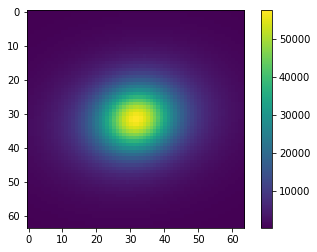

In [182]:
    # fixed parameters 
    image_size = 64        # n x n pixels
    pixel_scale = 0.23     # arcsec / pixel
    random_seed = 1314662
    rng = galsim.BaseDeviate(random_seed+1)
    bulge_n = 3.5          # Fixed 
    atmos_fwhm=2.1         # arcsec
    psf_sigma = 1    # arcsec   fixed here 
    
    
    #parameter random generations  
    gal_flux = 1e6* random.uniform(1,100)        # ADU  ("Analog-to-digital units", the units of the numbers on a CCD)
    bulge_re = random.uniform(0,3)         # arcsec
    disk_n = random.uniform(1,2)          #
    disk_r0 = random.uniform(0,1)        # arcsec (corresponds to half_light_radius of ~3.7 arcsec)
    bulge_frac = random.uniform(0,1)    # 0 ~ 1 

    
    gal_q = random.uniform(0.1,0.8)       # (axis ratio 0 < q < 1)
    gal_beta = random.uniform(0,180)        # degrees (position angle on the sky)
    atmos_e = random.uniform(0,1)         #
    atmos_beta = random.uniform(0,3.14)       # radians

    wcs_g1 = -random.uniform(0,0.3)      # -0.3 ~ 0  
    wcs_g2 = random.uniform(0,0.3)   #  0 ~ 0.3  
    
    
    
    bulge = galsim.Sersic(bulge_n, half_light_radius=bulge_re)
    disk = galsim.Sersic(disk_n, scale_radius=disk_r0)
    gal = bulge_frac * bulge + (1-bulge_frac) * disk
    gal = gal.withFlux(gal_flux)
    gal_shape = galsim.Shear(q=gal_q, beta=gal_beta*galsim.degrees)
    gal = gal.shear(gal_shape)
    atmos = galsim.Kolmogorov(fwhm=atmos_fwhm)
    atmos = atmos.shear(e=atmos_e, beta=atmos_beta*galsim.radians)
    wcs = galsim.ShearWCS(scale=pixel_scale, shear=galsim.Shear(g1=wcs_g1, g2=wcs_g2))
    psf_gaussian = galsim.Gaussian(flux=1., sigma=psf_sigma) # PSF flux should always = 1
    psf = galsim.Convolve([atmos,  psf_gaussian ])
    final = galsim.Convolve([psf, gal])
    image = galsim.ImageF(image_size, image_size)
    final.drawImage(image=image, wcs=wcs)

    plt.imshow(image.array)
    plt.colorbar()
    
    
    
    print("gal_flux=",gal_flux)
    print(" bulge_re", bulge_re)
    print(" disk_n",disk_n )
    print("  disk_r0",  disk_r0)
    print("  bulge_frac",  bulge_frac)
    print(" gal_q", gal_q)
    print(" gal_beta", gal_beta)
    print(" atmos_e", atmos_e)
    print(" atmos_beta", atmos_beta)
    print("wcs_g1=",wcs_g1)
    print("wcs_g2=",wcs_g2)
    
    
